# A friendly competition
A local bank has come to our class for help.*  They have been lending out money to a large community for decades, but are unhappy with how good they are in deciding to lend money to the right people. They would like greater insight into what it is about their customers that influences whether loans get paid back or not.

They have provided us with a good size dataset spanning many years of lending activity.

The dataset contains the following data for over 7700 past loans:

     default: 1 for a default on the loan, 0 for paid back in full.

     amount_of_loan: how much was lent out.

     credit_rating: from A to G. A is great, G is not so great.

     years_with_bank: how long the customer has been with the bank.

     rent_mortgage_own: 0 for own, 1 for mortgage, and 2 for owner (without any debt).

     income: the annual income of the customer at the time of the loan.

     age: the age of the customer at the time of the loan.

You can download the dataset in CSV format here.

(the dataset does require a little bit of cleanup and transformation, but nothing that you cannot now easily handle :)

# The Task
The goal for this assignment is to find an optimal model for predicting a new loan applicant's likelihood of paying back a new loan.

Use any algorithm to build a classification model for this dataset, subject to the following constraints:

you should split the dataset into a training and test set, with a test set of at least 20%.

you must use at least two of the six features.

The key metric will be Accuracy, with an emphasis on keeping false positives low, and in any event lower than any false negatives (the bank has told us that they do not want to refuse a loan for someone who would have paid it back, but would rather not lend to someone who was predicted as not defaulting, when they will). 

Your model should be cross-validated.

You should feel free to use ensemble versions of algorithms (where available), as well as Grid Search to find optimal hyperparameters. You will want to try all of the algorithms we have studied so far.

Submit
Your Jupyter Notebook with your analysis, model building, and results.

Report your best Accuracy score to 4 decimal points (XX.xxxx).

Report on which features are the most important in your model, with a visual.

# We start with taking a look at the data and any remaining cleanup and transformation that needs to be done:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Let's read the data into a pandas dataframe
df = pd.read_csv('loan_history_almost_clean.csv')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7727 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   default            7727 non-null   int64  
 1   amount_of_loan     7727 non-null   int64  
 2   credit_rating      7727 non-null   object 
 3   years_with_bank    7726 non-null   float64
 4   rent_mortgage_own  7727 non-null   int64  
 5   income             7727 non-null   float64
 6   age                7727 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 422.7+ KB


,default,amount_of_loan,years_with_bank,rent_mortgage_own,income,age
count,7727.000000,7727.000000,7726.000000,7727.000000,7.727000e+03,7727.000000
mean,0.478452,9453.345412,6.044654,0.560114,6.337197e+04,27.542125
std,0.499568,6298.595800,6.600555,0.644962,4.687195e+04,6.132121
min,0.000000,500.000000,0.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,2.000000,0.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,4.000000,0.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,8.000000,1.000000,7.679650e+04,30.000000
max,1.000000,35000.000000,62.000000,2.000000,1.200000e+06,94.000000


In [2]:
# Let's remove the row with the missing value
df2 = df.dropna(subset=['years_with_bank'], axis=0)
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   default            7726 non-null   int64  
 1   amount_of_loan     7726 non-null   int64  
 2   credit_rating      7726 non-null   object 
 3   years_with_bank    7726 non-null   float64
 4   rent_mortgage_own  7726 non-null   int64  
 5   income             7726 non-null   float64
 6   age                7726 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 482.9+ KB


,default,amount_of_loan,years_with_bank,rent_mortgage_own,income,age
count,7726.000000,7726.000000,7726.000000,7726.000000,7.726000e+03,7726.000000
mean,0.478514,9454.245405,6.044654,0.560057,6.337427e+04,27.542066
std,0.499570,6298.506573,6.600555,0.644984,4.687455e+04,6.132515
min,0.000000,500.000000,0.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,2.000000,0.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,4.000000,0.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,8.000000,1.000000,7.679825e+04,30.000000
max,1.000000,35000.000000,62.000000,2.000000,1.200000e+06,94.000000


In [3]:
# We'll make a dictionary to map the values of the credit_rating column to numbers
credit_rating_dict = {'H': 8, 'G': 7, 'F': 6, 'E': 5, 'D': 4, 'C': 3, 'B': 2, 'A': 1}

# We'll use the map function to map the values in the credit_rating column to the numbers in the dictionary
# We'll use the copy function to make a copy of the dataframe so we don't overwrite the original
df3 = df2.copy()
df3['credit_rating'] = df2['credit_rating'].map(credit_rating_dict)

df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   default            7726 non-null   int64  
 1   amount_of_loan     7726 non-null   int64  
 2   credit_rating      7726 non-null   int64  
 3   years_with_bank    7726 non-null   float64
 4   rent_mortgage_own  7726 non-null   int64  
 5   income             7726 non-null   float64
 6   age                7726 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 482.9 KB


,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
count,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7.726000e+03,7726.000000
mean,0.478514,9454.245405,2.404090,6.044654,0.560057,6.337427e+04,27.542066
std,0.499570,6298.506573,1.226906,6.600555,0.644984,4.687455e+04,6.132515
min,0.000000,500.000000,1.000000,0.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,1.000000,2.000000,0.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,2.000000,4.000000,0.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,3.000000,8.000000,1.000000,7.679825e+04,30.000000
max,1.000000,35000.000000,7.000000,62.000000,2.000000,1.200000e+06,94.000000


# Below is a snippet of our final dataframe df3

In [4]:
df3
dfFinal = df3

# The below heatmap will be interesting later

It will be interesting to see wether the combinations with the best scores correspond to the heatmap values below.

<AxesSubplot:>

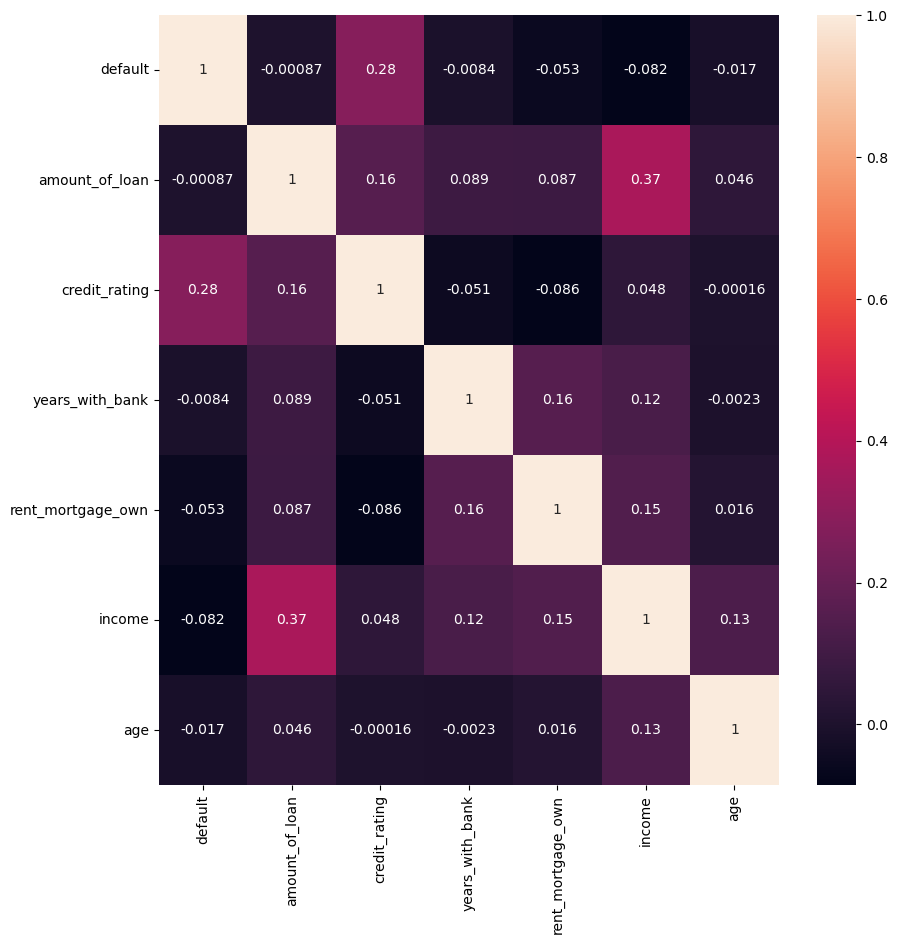

In [5]:
# Let us put all the features in a correlation matrix
# and display it with a seaborn heatmap
corr = dfFinal.corr()

plt.figure(figsize=(10,10))
sns.heatmap(data=dfFinal.corr(), annot=True)

# Since this is a classification issue we will run the below algorithms on all possible combinations of the features via the GridSearchCV function which combines and streamlines the process of cross-validation and hyperparameter tuning:

     - Logistic Regression

     - Naive Bayes
     
     - K-Nearest Neighbors

     - Random Forest

     - Support Vector Machine - CUT OUT DUE TO RUNTIME

In the cell below I have all the setup it took to get the big model-dataset evaluation automated.
These three function streamlined the process heavily, but it took long to configure correctly.

In [58]:
# Import the accuracy score function
from sklearn.metrics import accuracy_score

# Import the train_test_split function
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedKFold, GridSearchCV

# Import the scaler to scale the feature values
from sklearn.preprocessing import StandardScaler

# Import the confusion matrix and confusion matrix display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Import the random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Import the Support Vector Machine
from sklearn.svm import SVC

# Import the K Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Import the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

import itertools

# Define a function that takes in a dataFrame
# and returns a list of all the possible feature combinations
def featureCombinations(dataFrame, printLists=False):
    '''
    Takes in a dataFrame and returns a list of lists of all the possible feature combinations
    that you want to run against the column to be predicted
    '''

    combinations = []

    columnNames = dataFrame.columns

    for i in range(len(columnNames)):
        combinations.extend(list(itertools.combinations(columnNames, i)))

    uniqueCombinations = list(set(combinations))

    for i in range(len(uniqueCombinations) - 1):
        if uniqueCombinations[i] == ():
            # Remove the empty set out of the list
            uniqueCombinations.pop(i)

    # For debugging purposes
    # print(uniqueCombinations)

    return uniqueCombinations


# Define a function to iterate over the several models
# and get their confusion matrix, accuracy score,
# as well as GridSearchCV to find the optimal model and parameters
def evalDataset(model, paramGrid, dataFrameXs, dataFrameY, randomState=81333):
    '''
    Takes in a list of models to be evaluated with the dataFrame provided.
    The function iterates over every possible combination of features and
    models with the GridSearchCV to find the best model and parameters.
    It returns a list of the best models and a list of the best parameters.
    '''
    # Create a list of lists for all the different feature combinations
    combinations = featureCombinations(dataFrameXs, printLists=True)

    y = dataFrameY.values

    # A scaler to scale the feature values for each combination in the loop
    scaler = StandardScaler()

    # Instantiate our cross validation strategy
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=randomState)

    # Instantiate a list to store the results
    results = []

    i = 1

    print("Init done. Main iteration starting...")

    for combination in combinations:

        print("Eval combination " + str(i) + "...")

        values = []

        # Get the scaled features for the current combination
        X = dataFrameXs[list(combination)].values
        X = scaler.fit_transform(X, y)

        # Each model we have to instantiate the gridSearchCV new
        # roc_auc is "area under the curve" error evaluation
        # it calculates the probability that the model ranks a random positive example more highly than a random negative example.
        # AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0
        # one whose predictions are 100% correct has an AUC of 1.0.
        #
        # n_jobs is the jobs to run in parallel
        # -1 means using all processors
        #
        # cv is the k-fold cross validation strategy - the k

        print("Starting Grid Search")
        grid = GridSearchCV(estimator=model, param_grid=paramGrid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=0, refit=True, return_train_score=True)

        # Fit the model to the data
        grid.fit(X, y)

        cvResults = grid.cv_results_

        # Print the current grid object and combination (for debugging)
        # print(combination)
        # print(grid)

        print("Grid Search done...")

        # Print the best score and the best parameters
        print("Best score for combination " + str(i) + ": ", grid.best_score_)
        i = i + 1
        # Put the values of the current combination into the list
        values.append(combination)
        values.append(grid.best_score_)
        values.append(grid.best_params_)
        values.append(grid.best_estimator_)
        values.append(cvResults)
        
        # Append the list of values to the results list
        results.append(values)
    
    return results

# A little function to find the best score and corresponding parameters
# in the results list
def findBestScore(results):
    '''
    Takes in a list of results from the evalDataset function
    and returns the best score and the corresponding parameters
    '''
    # Find the best parameters and the best model
    absBestScore = 0
    for i in range(len(results)):
        if results[i][1] > absBestScore:
            absBestScore = results[i][1]
            bestParams = results[i][2]
            bestModel = results[i][3]
            bestCombination = results[i][0]

    print("Best score: ", absBestScore)
    print("With parameters ", bestParams)
    print("With model ", bestModel)
    print("With combination ", bestCombination)

    return absBestScore, bestParams, bestModel, bestCombination
        


# Now just to instantiate the models and the parameter grids for each of them

I had to comment out a lot of the hyperparameters because the runtime was too long.

In [66]:
# Let's try out the function we made here
# Instantiate the models we want to test
rf_class = RandomForestClassifier()
svc_class = SVC()
lr_class = LogisticRegression()
knn_class = KNeighborsClassifier()
nb_class = GaussianNB()

#models = [rf_class, svc_class, lr_class, knn_class, nb_class]

# Create a parameter grid for each of the models we want to test

# parameter grid for random forest classifier
paramGridRF =   {
                #'n_jobs': [1],
                #'n_estimators': [10, 20],
                'max_depth': [2, 5],
                #'min_samples_split': [2, 10, 20],
                #'min_samples_leaf': [2, 10, 20],
                'max_features': ['auto', 'sqrt', 'log2'],
                #'criterion': ['gini', 'entropy']
                }

# parameter grid for support vector machine
## I had to cut out SVC because of time constraints
# paramGridSVC =  {
#                 'C': [1],
#                 #'gamma': [1, 0.1],
#                 #'kernel': ['rbf', 'poly', 'sigmoid'],
#                 #'degree': [2, 3, 4, 5]
#                 }

# parameter grid for logistic regression
paramGridLR =   {
                'penalty': ['l1', 'l2'],
                'C': [1, 2],
                #'solver': ['newton-cg', 'lbfgs', 'sag'],
                #'max_iter': [10, 20],
                }

# parameter grid for K Nearest Neighbors
paramGridKNN =  {
                'n_neighbors': [1, 2, 8],
                'weights': ['uniform', 'distance'],
                #'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                #'leaf_size': [10, 20, 40],
                'p': [2]
                }

# parameter grid for Naive Bayes
paramGridNB =   {
                'var_smoothing': [1e-4, 1e-2, 1]
                }


In [68]:
# Lets try our function on all models and parameter grids that we wanted
# and see if we can crack our top accuracy of 0.6808...

# Instantiate a list to store the results
allResults = []


# print("Scores for the support vector machine model: ")
# svcResults = evalDataset(svc_class, paramGridSVC, dataFrameXs = dfFinal.drop(labels='default', axis='columns'), dataFrameY = dfFinal['default'], randomState=81333)
# findBestScore(svcResults)
# allResults.append(svcResults)

print("Scores for the logistic regression model: ")
lrResults = evalDataset(lr_class, paramGridLR, dataFrameXs = dfFinal.drop(labels='default', axis='columns'), dataFrameY = dfFinal['default'], randomState=81333)
findBestScore(lrResults)
allResults.append(lrResults)

print("Scores for the KNN model: ")
knnResults = evalDataset(knn_class, paramGridKNN, dataFrameXs = dfFinal.drop(labels='default', axis='columns'), dataFrameY = dfFinal['default'], randomState=81333)
findBestScore(knnResults)
allResults.append(knnResults)

print("Scores for the random forest model: ")
rfResults = evalDataset(rf_class, paramGridRF, dataFrameXs = dfFinal.drop(labels='default', axis='columns'), dataFrameY = dfFinal['default'], randomState=81333)
findBestScore(rfResults)
allResults.append(rfResults)

print("Scores for the naive bayes model: ")
nbResults = evalDataset(nb_class, paramGridNB, dataFrameXs = dfFinal.drop(labels='default', axis='columns'), dataFrameY = dfFinal['default'], randomState=81333)
findBestScore(nbResults)
allResults.append(nbResults)

Scores for the logistic regression model: 
Init done. Main iteration starting...
Eval combination 1...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 1:  0.680996450215304
Eval combination 2...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 2:  0.5369509360427337
Eval combination 3...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 3:  0.5336583767663173
Eval combination 4...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 4:  0.6813241972279342
Eval combination 5...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 5:  0.498526481450868
Eval combination 6...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 6:  0.5816327861977932
Eval combination 7...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 7:  0.530066201492448
Eval combination 8...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 8:  0.6817868023089488
Eval combination 9...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 9:  0.6807474064495209
Eval combination 10...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 10:  0.5299085067912879
Eval combination 11...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 11:  0.6682586489656545
Eval combination 12...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 12:  0.661469106883744
Eval combination 13...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 13:  0.6599100110280725
Eval combination 14...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 14:  0.5759587161067502
Eval combination 15...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 15:  0.6811652781222829
Eval combination 16...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 16:  0.5806369585736226
Eval combination 17...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 17:  0.6687458707495227
Eval combination 18...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 18:  0.5818016277452773
Eval combination 19...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 19:  0.5226366472529623
Eval combination 20...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 20:  0.5769383385209556
Eval combination 21...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 21:  0.6694972547673875
Eval combination 22...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 22:  0.681021112064806
Eval combination 23...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 23:  0.5749019683033252
Eval combination 24...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 24:  0.5178656056627036
Eval combination 25...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 25:  0.6696555802223046
Eval combination 26...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 26:  0.6662191071201248
Eval combination 27...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 27:  0.6662440015167512
Eval combination 28...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 28:  0.5092044340375722
Eval combination 29...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 29:  0.5773797900576723
Eval combination 30...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 30:  0.6813918136647401
Eval combination 31...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 31:  0.5696525346557929
Eval combination 32...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 32:  0.6804847333892456
Eval combination 33...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 33:  0.6679338953483007
Eval combination 34...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 34:  0.5705526471140674
Eval combination 35...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 35:  0.6690986082964615
Eval combination 36...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 36:  0.6807822467813669
Eval combination 37...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 37:  0.6648982233215973
Eval combination 38...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 38:  0.66676639718312
Eval combination 39...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 39:  0.5195508249910954
Eval combination 40...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 40:  0.6802021923068154
Eval combination 41...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 41:  0.5705773845488209
Eval combination 42...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 42:  0.5747085548731861
Eval combination 43...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 43:  0.56971090656865
Eval combination 44...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 44:  0.6670280293470716
Eval combination 45...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 45:  0.5737217969473272
Eval combination 46...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 46:  0.6805014731453264
Eval combination 47...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 47:  0.5739242805043009
Eval combination 48...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 48:  0.5096001661493754
Eval combination 49...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 49:  0.5252586303077706
Eval combination 50...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 50:  0.6814935337267074
Eval combination 51...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 51:  0.6692280417280227
Eval combination 52...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 52:  0.6810999745708755
Eval combination 53...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 53:  0.5782511096119143
Eval combination 54...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 54:  0.5325310309952799
Eval combination 55...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 55:  0.4860798342871574
Eval combination 56...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 56:  0.6687068774094895
Eval combination 57...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 57:  0.5828177270703049
Eval combination 58...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 58:  0.6808852155921821
Eval combination 59...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 59:  0.5159124345862369
Eval combination 60...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 60:  0.5100839598273036
Eval combination 61...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 61:  0.669863110721867
Eval combination 62...
Starting Grid Search


c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, 

Grid Search done...
Best score for combination 62:  0.6807395863342149
Best score:  0.6817868023089488
With parameters  {'C': 1, 'penalty': 'l2'}
With model  LogisticRegression(C=1)
With combination  ('credit_rating', 'years_with_bank', 'income')
Scores for the KNN model: 
Init done. Main iteration starting...
Eval combination 1...
Starting Grid Search
Grid Search done...
Best score for combination 1:  0.6581742524216071
Eval combination 2...
Starting Grid Search
Grid Search done...
Best score for combination 2:  0.5026273237825926
Eval combination 3...
Starting Grid Search
Grid Search done...
Best score for combination 3:  0.5337414057158666
Eval combination 4...
Starting Grid Search
Grid Search done...
Best score for combination 4:  0.6281206873445205
Eval combination 5...
Starting Grid Search
Grid Search done...
Best score for combination 5:  0.5365567220136465
Eval combination 6...
Starting Grid Search
Grid Search done...
Best score for combination 6:  0.6143476086684337
Eval combi

In [77]:
# This will print all results for each model
# For debugging and validation purposes
# for result in allResults:
#     print("Results for model: " + str(result[0][3]))
#     print("")
#     print("")
#     for i in range(len(result)):
#         print("Combination: " + str(result[i][0]))
#         print("Best score of the GridSearchCV: " + str(result[i][1]))
#         print("With parameters: " + str(result[i][2]))
#         print("")
#     print("")
#     print("")
#     print("")
#     print("")

Results for model: LogisticRegression(C=2)


Combination: ('amount_of_loan', 'credit_rating', 'income')
Best score of the GridSearchCV: 0.680996450215304
With parameters: {'C': 2, 'penalty': 'l2'}

Combination: ('rent_mortgage_own', 'age')
Best score of the GridSearchCV: 0.5369509360427337
With parameters: {'C': 1, 'penalty': 'l2'}

Combination: ('years_with_bank', 'rent_mortgage_own', 'age')
Best score of the GridSearchCV: 0.5336583767663173
With parameters: {'C': 1, 'penalty': 'l2'}

Combination: ('credit_rating', 'income')
Best score of the GridSearchCV: 0.6813241972279342
With parameters: {'C': 1, 'penalty': 'l2'}

Combination: ('amount_of_loan', 'years_with_bank')
Best score of the GridSearchCV: 0.498526481450868
With parameters: {'C': 1, 'penalty': 'l2'}

Combination: ('amount_of_loan', 'income', 'age')
Best score of the GridSearchCV: 0.5816327861977932
With parameters: {'C': 1, 'penalty': 'l2'}

Combination: ('amount_of_loan', 'years_with_bank', 'rent_mortgage_own', 'age')
Best 

# And now we have can display the best scores from each grid search cross validation from each model and each combination of features

In [78]:
# Let's look at the best scores for each model
# with their corresponding parameters
for result in allResults:
    findBestScore(result)
    print("")
    print("")
    print("")

Best score:  0.6817868023089488
With parameters  {'C': 1, 'penalty': 'l2'}
With model  LogisticRegression(C=1)
With combination  ('credit_rating', 'years_with_bank', 'income')



Best score:  0.7088362094513739
With parameters  {'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
With model  KNeighborsClassifier(n_neighbors=8, weights='distance')
With combination  ('amount_of_loan', 'credit_rating', 'years_with_bank', 'income', 'age')



Best score:  0.6903327244664169
With parameters  {'max_depth': 5, 'max_features': 'sqrt'}
With model  RandomForestClassifier(max_depth=5, max_features='sqrt')
With combination  ('amount_of_loan', 'credit_rating', 'years_with_bank', 'income', 'age')



Best score:  0.6808802744126556
With parameters  {'var_smoothing': 1}
With model  GaussianNB(var_smoothing=1)
With combination  ('credit_rating', 'income')





# Seeing the scores above you can see that the best score is 0.7088 for the K-Nearest Neighbors model

Whats interesting is that there does not seem to be any correlation between the heatmap correlations and the combinations that yield the best scores.


In [80]:
# Instantiating dataFrames for each model
# and changing the column names to what the values correspond to
dfLrResults = pd.DataFrame(lrResults, columns=['combination', 'bestScore', 'bestParams', 'bestModel', 'cvResults'])

dfRfResults = pd.DataFrame(rfResults, columns=['combination', 'bestScore', 'bestParams', 'bestModel', 'cvResults'])

dfKnnResults = pd.DataFrame(knnResults, columns=['combination', 'bestScore', 'bestParams', 'bestModel', 'cvResults'])

dfNbResults = pd.DataFrame(nbResults, columns=['combination', 'bestScore', 'bestParams', 'bestModel', 'cvResults'])

# In this section you can see all dataframes with the results individually:

# Logistic Regression:

In [81]:
dfLrResults

,combination,bestScore,bestParams,bestModel,cvResults
0,"(amount_of_loan, credit_rating, income)",0.680996,"{'C': 2, 'penalty': 'l2'}",LogisticRegression(C=2),"{'mean_fit_time': [0.0008180904388427735, 0.01..."
1,"(rent_mortgage_own, age)",0.536951,"{'C': 1, 'penalty': 'l2'}",LogisticRegression(C=1),"{'mean_fit_time': [0.00047833919525146483, 0.0..."
2,"(years_with_bank, rent_mortgage_own, age)",0.533658,"{'C': 1, 'penalty': 'l2'}",LogisticRegression(C=1),"{'mean_fit_time': [0.0007981395721435547, 0.00..."
3,"(credit_rating, income)",0.681324,"{'C': 1, 'penalty': 'l2'}",LogisticRegression(C=1),"{'mean_fit_time': [0.0004587507247924805, 0.01..."
4,"(amount_of_loan, years_with_bank)",0.498526,"{'C': 1, 'penalty': 'l2'}",LogisticRegression(C=1),"{'mean_fit_time': [0.0004988670349121094, 0.01..."
...,...,...,...,...,...
57,"(credit_rating, years_with_bank, rent_mortgage...",0.680885,"{'C': 1, 'penalty': 'l2'}",LogisticRegression(C=1),"{'mean_fit_time': [0.000558924674987793, 0.014..."
58,"(years_with_bank, age)",0.515912,"{'C': 1, 'penalty': 'l2'}",LogisticRegression(C=1),"{'mean_fit_time': [0.00031909465789794924, 0.0..."
59,"(years_with_bank,)",0.510084,"{'C': 1, 'penalty': 'l2'}",LogisticRegression(C=1),"{'mean_fit_time': [0.0004192924499511719, 0.00..."
60,"(amount_of_loan, credit_rating, rent_mortgage_...",0.669863,"{'C': 1, 'penalty': 'l2'}",LogisticRegression(C=1),"{'mean_fit_time': [0.0005187368392944335, 0.01..."


# Naive Bayes:

In [82]:
dfNbResults

,combination,bestScore,bestParams,bestModel,cvResults
0,"(amount_of_loan, credit_rating, income)",0.680477,{'var_smoothing': 1},GaussianNB(var_smoothing=1),"{'mean_fit_time': [0.004507856369018555, 0.004..."
1,"(rent_mortgage_own, age)",0.534019,{'var_smoothing': 1},GaussianNB(var_smoothing=1),"{'mean_fit_time': [0.004328241348266601, 0.004..."
2,"(years_with_bank, rent_mortgage_own, age)",0.529727,{'var_smoothing': 1},GaussianNB(var_smoothing=1),"{'mean_fit_time': [0.005246410369873047, 0.004..."
3,"(credit_rating, income)",0.680880,{'var_smoothing': 1},GaussianNB(var_smoothing=1),"{'mean_fit_time': [0.00406923770904541, 0.0043..."
4,"(amount_of_loan, years_with_bank)",0.521167,{'var_smoothing': 0.0001},GaussianNB(var_smoothing=0.0001),"{'mean_fit_time': [0.0039288997650146484, 0.00..."
...,...,...,...,...,...
57,"(credit_rating, years_with_bank, rent_mortgage...",0.675226,{'var_smoothing': 1},GaussianNB(var_smoothing=1),"{'mean_fit_time': [0.004887452125549316, 0.004..."
58,"(years_with_bank, age)",0.505283,{'var_smoothing': 1},GaussianNB(var_smoothing=1),"{'mean_fit_time': [0.0038696765899658204, 0.00..."
59,"(years_with_bank,)",0.504273,{'var_smoothing': 0.0001},GaussianNB(var_smoothing=0.0001),"{'mean_fit_time': [0.002054781913757324, 0.002..."
60,"(amount_of_loan, credit_rating, rent_mortgage_...",0.665840,{'var_smoothing': 1},GaussianNB(var_smoothing=1),"{'mean_fit_time': [0.00550480842590332, 0.0052..."


# Random Forest:

In [83]:
dfRfResults

,combination,bestScore,bestParams,bestModel,cvResults
0,"(amount_of_loan, credit_rating, income)",0.686846,"{'max_depth': 5, 'max_features': 'log2'}","(DecisionTreeClassifier(max_depth=5, max_featu...","{'mean_fit_time': [0.4791985416412354, 0.47572..."
1,"(rent_mortgage_own, age)",0.537020,"{'max_depth': 5, 'max_features': 'log2'}","(DecisionTreeClassifier(max_depth=5, max_featu...","{'mean_fit_time': [0.49150604724884034, 0.4748..."
2,"(years_with_bank, rent_mortgage_own, age)",0.541536,"{'max_depth': 5, 'max_features': 'auto'}","(DecisionTreeClassifier(max_depth=5, max_featu...","{'mean_fit_time': [0.5464394521713257, 0.50177..."
3,"(credit_rating, income)",0.683175,"{'max_depth': 5, 'max_features': 'auto'}","(DecisionTreeClassifier(max_depth=5, max_featu...","{'mean_fit_time': [0.5471372747421265, 0.47586..."
4,"(amount_of_loan, years_with_bank)",0.535579,"{'max_depth': 5, 'max_features': 'log2'}","(DecisionTreeClassifier(max_depth=5, max_featu...","{'mean_fit_time': [0.4419982433319092, 0.43068..."
...,...,...,...,...,...
57,"(credit_rating, years_with_bank, rent_mortgage...",0.689655,"{'max_depth': 5, 'max_features': 'log2'}","(DecisionTreeClassifier(max_depth=5, max_featu...","{'mean_fit_time': [0.4842057752609253, 0.48450..."
58,"(years_with_bank, age)",0.525230,"{'max_depth': 5, 'max_features': 'log2'}","(DecisionTreeClassifier(max_depth=5, max_featu...","{'mean_fit_time': [0.4246245050430298, 0.42360..."
59,"(years_with_bank,)",0.508509,"{'max_depth': 5, 'max_features': 'log2'}","(DecisionTreeClassifier(max_depth=5, max_featu...","{'mean_fit_time': [0.41199910163879394, 0.4158..."
60,"(amount_of_loan, credit_rating, rent_mortgage_...",0.674688,"{'max_depth': 5, 'max_features': 'sqrt'}","(DecisionTreeClassifier(max_depth=5, max_featu...","{'mean_fit_time': [0.4750493049621582, 0.48879..."


# K-Nearest Neighbors:

In [84]:
dfKnnResults

,combination,bestScore,bestParams,bestModel,cvResults
0,"(amount_of_loan, credit_rating, income)",0.658174,"{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}","KNeighborsClassifier(n_neighbors=8, weights='d...","{'mean_fit_time': [0.016098079681396486, 0.017..."
1,"(rent_mortgage_own, age)",0.502627,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",KNeighborsClassifier(n_neighbors=1),"{'mean_fit_time': [0.012146902084350587, 0.012..."
2,"(years_with_bank, rent_mortgage_own, age)",0.533741,"{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}","KNeighborsClassifier(n_neighbors=8, weights='d...","{'mean_fit_time': [0.01571795463562012, 0.0172..."
3,"(credit_rating, income)",0.628121,"{'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}",KNeighborsClassifier(n_neighbors=8),"{'mean_fit_time': [0.01136911392211914, 0.0117..."
4,"(amount_of_loan, years_with_bank)",0.536557,"{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}","KNeighborsClassifier(n_neighbors=8, weights='d...","{'mean_fit_time': [0.011608762741088867, 0.011..."
...,...,...,...,...,...
57,"(credit_rating, years_with_bank, rent_mortgage...",0.706487,"{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}","KNeighborsClassifier(n_neighbors=8, weights='d...","{'mean_fit_time': [0.021003122329711913, 0.020..."
58,"(years_with_bank, age)",0.521947,"{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}","KNeighborsClassifier(n_neighbors=8, weights='d...","{'mean_fit_time': [0.010052828788757325, 0.010..."
59,"(years_with_bank,)",0.500829,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",KNeighborsClassifier(n_neighbors=1),"{'mean_fit_time': [0.00590334415435791, 0.0062..."
60,"(amount_of_loan, credit_rating, rent_mortgage_...",0.638343,"{'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}",KNeighborsClassifier(n_neighbors=8),"{'mean_fit_time': [0.01727236270904541, 0.0172..."


# Now lets make confusion matrices for all of the models and parameters that yielded the best scores:

In [101]:
# Making a function to create confusion matrices for the best models and combinations
def makeMatrix(X, y, model):
     '''
     This function takes in extracted X features, and a targeted y feature
     and a model that will be fit to the data to return a confusion matrix
     '''
     
     # fit transform the data
     ohe = StandardScaler()

     X = ohe.fit_transform(X, y)

     model.fit(X, y)

     confusion_matrix(y, model.predict(X))

     # Visualize the confusion matrix with seaborn
     # The x axis is the predicted values
     # The y axis is the actual values
     plt.title('Confusion Matrix for the ' + str(model.__class__) + ' Model')
     sns.heatmap(confusion_matrix(y, model.predict(X)), annot=True, fmt='d', cmap='Blues', yticklabels=['Paid back in Full', 'Default'], xticklabels=['Paid back in Full', 'Default'])


# Get y for all the models
y = dfFinal['default'].values

# Confusion Matrix for Logistic Regression:

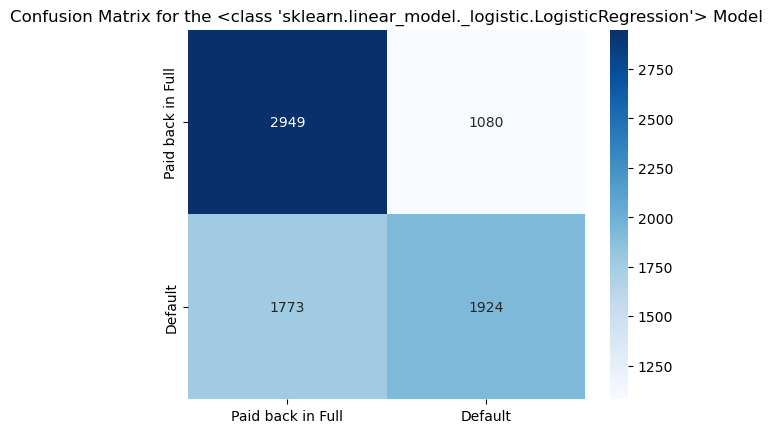

In [102]:
# Get X as the best combination for each model
X_lr = dfFinal[['credit_rating', 'years_with_bank', 'income']].values
X_rf = dfFinal[['amount_of_loan', 'credit_rating', 'years_with_bank', 'income', 'age']].values
X_knn = dfFinal[['amount_of_loan', 'credit_rating', 'years_with_bank', 'income', 'age']].values
X_nb = dfFinal[['credit_rating', 'income']].values

makeMatrix(X_lr, y, lr_class)

# Confusion Matrix for Naive Bayes:

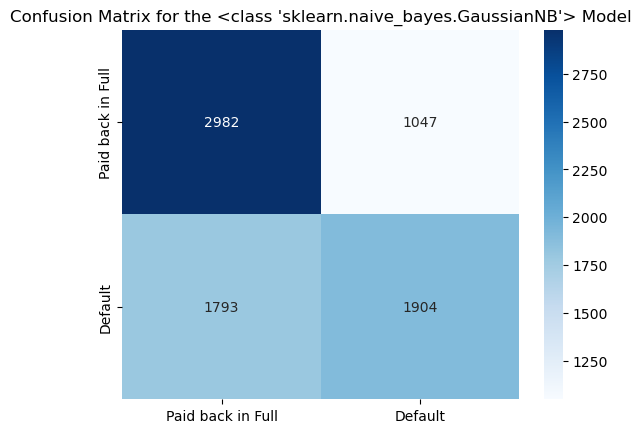

In [103]:
makeMatrix(X_nb, y, nb_class)

# Confusion Matrix for Random Forest:

WOW! The Random Forest model is the best one by far. It has the highest accuracy score and the lowest false positives and false negatives.
I did not expect that, knowing KNN scored a higher accuracy than the Random Forest model.

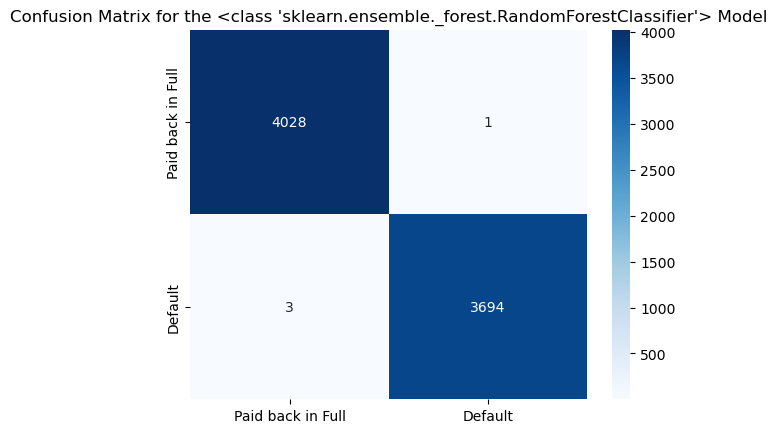

In [104]:
makeMatrix(X_rf, y, rf_class)

# Confusion Matrix for K-Nearest Neighbors:

c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\wodue\Desktop\Programming\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

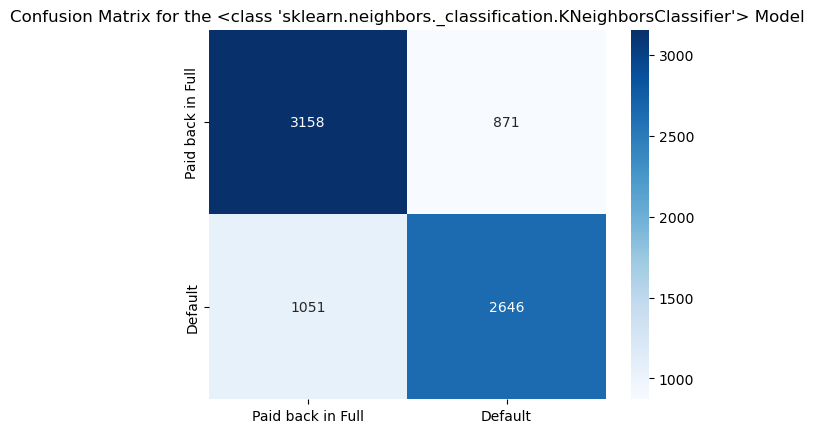

In [105]:
makeMatrix(X_knn, y, knn_class)

# To summarize from above:

     The highest score of accuracy we have gotten iterating over the four chosen models
     was the K-Nearest Neighbors model with a score of 0.7088
     and a combination of the features:
          'amount_of_loan',
          'credit_rating',   
          'years_with_bank',
          'income',
          'age'

     and the modified hyperparameters:
          'n_neighbors': [1, 2, 8],
          'weights': ['uniform', 'distance'],
          'p': [2]



# However,

doing the confusion matrices afterwards we found out that the Random Forest model is the best one by far
for this particular scenario since it has the lowest false positive AND false negative scores.

     The Random Forest model had an accuracy score of 0.6903
     With the combination:
          'amount_of_loan',
          'credit_rating',   
          'years_with_bank',
          'income',
          'age'
     
     and the modified hyperparameters:
          'max_depth': [2, 5],
          'max_features': ['auto', 'sqrt', 'log2']
          